In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from typing import cast

from stochastic_volatility_models.src.models.rough_bergomi import simulate
from stochastic_volatility_models.src.core.pricing_models import PricingModel
from stochastic_volatility_models.src.core.underlying import Underlying
from stochastic_volatility_models.src.core.volatility_surface import VolatilitySurface
from stochastic_volatility_models.src.models.rough_bergomi import RoughBergomi
from stochastic_volatility_models.visualisations.volatility_surface import plot_volatility_surface
from stochastic_volatility_models.src.utils.options.expiry import time_to_expiry
from stochastic_volatility_models.src.utils.options.strikes import find_closest_strikes

2024-08-07 02:09:54.395 | INFO     | stochastic_volatility_models.config:initialise:30 - Loaded module `stochastic_volatility_models` from project directory path `/Users/mayurankv/Documents/Mayuran/Programming/Projects/Academic/Imperial College London/MSc Statistics/Dissertation/Project/modules`


In [2]:
ticker = "SPX"
spx = Underlying(ticker)
vix = Underlying("VIX")
pricing_model = PricingModel()
time = np.datetime64("2022-03-03")

In [3]:
expiries = np.array(
	["2022-03-04", "2022-03-09", "2022-03-11", "2022-03-18", "2022-03-23", "2022-03-25", "2022-03-30", "2022-03-31", "2022-04-01", "2022-04-08", "2022-04-14", "2022-04-22", "2022-04-29", "2022-05-20", "2022-05-31", "2022-06-17", "2022-06-30", "2022-07-15", "2022-07-29", "2022-08-31"], dtype=np.datetime64
)

strikes = np.array(
	[
		2200,
		2400,
		2600,
		2800,
		3000,
		3200,
		3400,
		3500,
		3600,
		3700,
		3800,
		3850,
		3900,
		3950,
		3975,
		4000,
		4025,
		4040,
		4050,
		4060,
		4070,
		4075,
		4080,
		4090,
		4100,
		4110,
		4120,
		4125,
		4130,
		4140,
		4150,
		4160,
		4170,
		4175,
		4180,
		4190,
		4200,
		4210,
		4220,
		4225,
		4230,
		4240,
		4250,
		4260,
		4270,
		4275,
		4280,
		4290,
		4300,
		4310,
		4320,
		4325,
		4330,
		4340,
		4350,
		4360,
		4370,
		4375,
		4380,
		4390,
		4400,
		4410,
		4420,
		4425,
		4430,
		4440,
		4450,
		4460,
		4470,
		4475,
		4480,
		4490,
		4500,
		4510,
		4525,
		4550,
		4600,
		4650,
		4700,
		4800,
		5000,
		5200,
		5400,
	]
)
spx_vs = VolatilitySurface(
	underlying=spx,
	expiries=expiries,
	strikes=strikes,
	monthly=False,
)

In [4]:
expiries = np.array(["2022-03-09", "2022-03-23", "2022-03-30", "2022-04-06"], dtype=np.datetime64)

strikes = np.array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32.5, 35, 37.5, 40, 42.5, 45, 47.5, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100])
vix_vs = VolatilitySurface(
	underlying=vix,
	expiries=expiries,
	strikes=strikes,
	monthly=False,
)

In [5]:
model = RoughBergomi(
	parameters={
		"hurst_index": 0.93,
		"wiener_correlation": -0.9,
		"volatility_of_volatility": 1.9,
	}
)

In [6]:
spx_vs.model_price(time=time, model=model)

,Mid
SPXW 220304C2200000,2163.017078
SPXW 220304P2200000,0.000000
SPXW 220309C2200000,2162.897269
SPXW 220309P2200000,0.014250
SPXW 220311C2200000,2162.601656
...,...
SPXW 220715P5400000,1072.925107
SPXW 220729C5400000,52.800010
SPXW 220729P5400000,1081.345199
SPXW 220831C5400000,70.254910


In [7]:
fig = plot_volatility_surface(
	time=time,
	volatility_surface=spx_vs,
	quantity_method="model_price",
	model=model,
	plot_parameters={"moneyness": False, "time_to_expiry": False, "log_moneyness": False, "mid_price": True},
	out_the_money=False,
)
fig.show()


fig = plot_volatility_surface(
	time=time,
	volatility_surface=spx_vs,
	quantity_method="model_pricing_implied_volatility",
	pricing_model=PricingModel(),
	model=model,
	plot_parameters={"moneyness": False, "time_to_expiry": False, "log_moneyness": False, "mid_price": True},
	out_the_money=False,
)
fig.show()

T: 2022-03-04


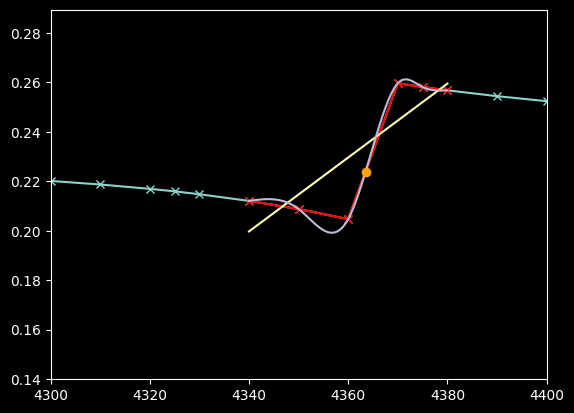

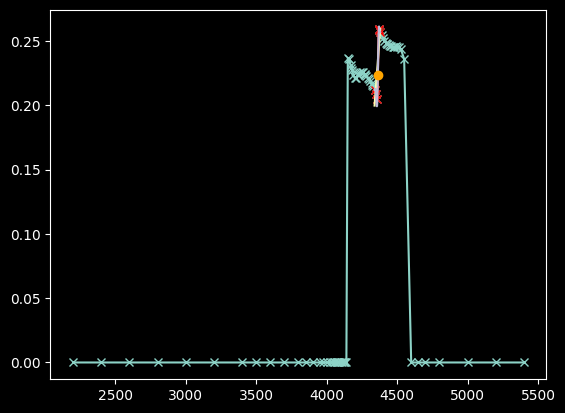

T: 2022-03-09


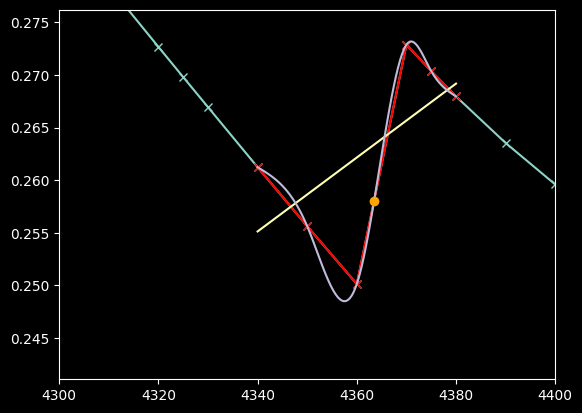

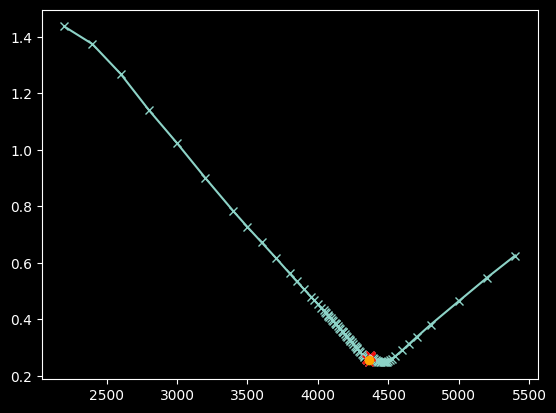

T: 2022-03-11


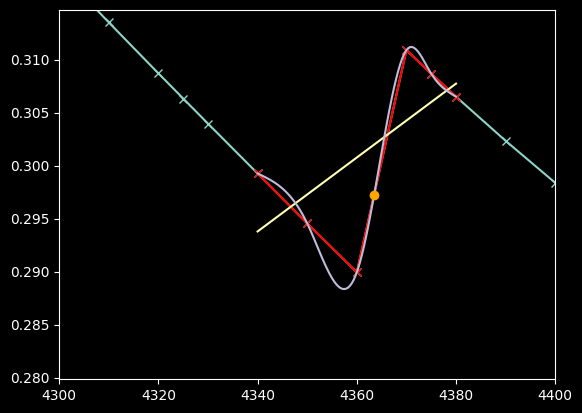

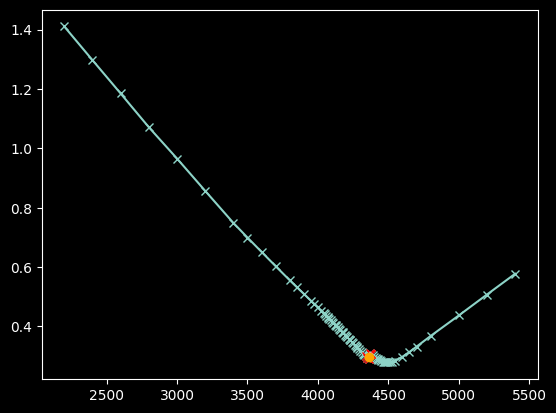

T: 2022-03-18


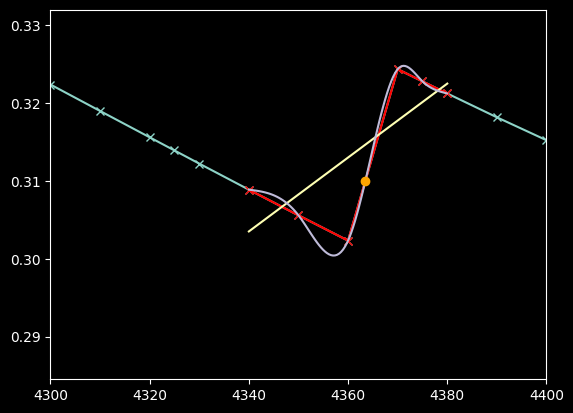

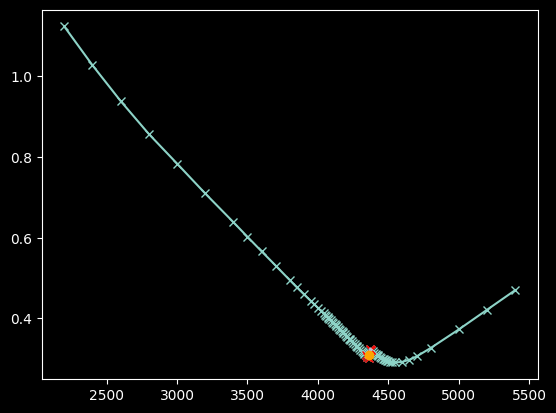

T: 2022-03-23


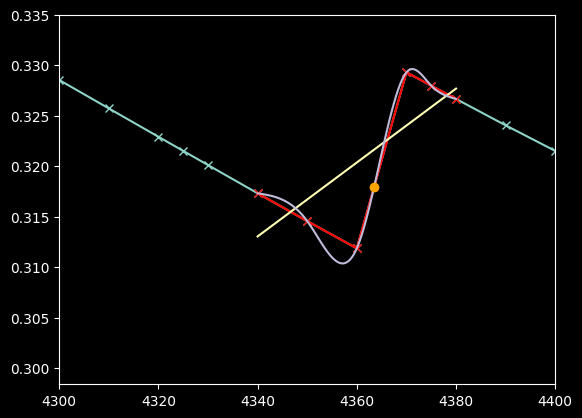

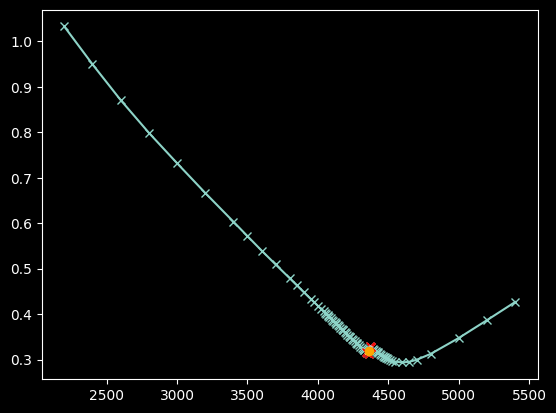

T: 2022-03-25


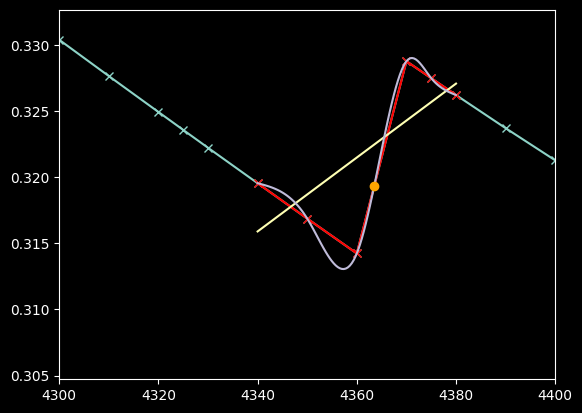

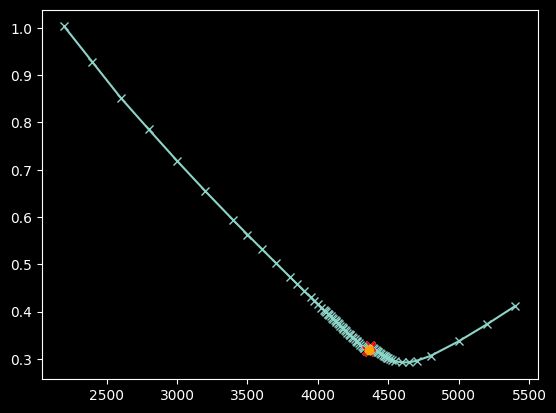

T: 2022-03-30


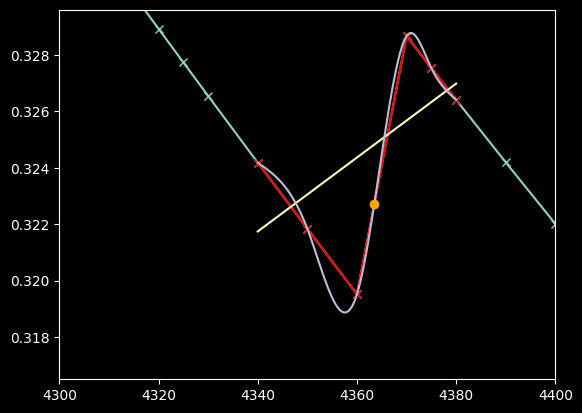

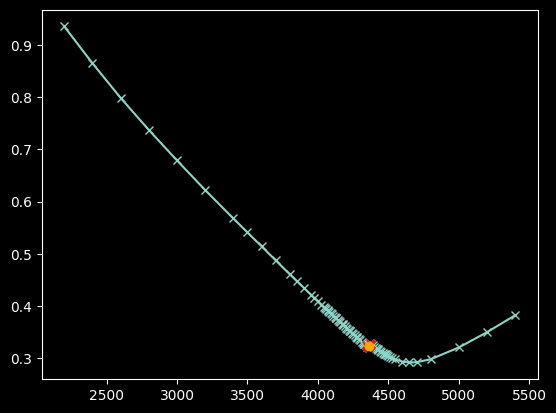

T: 2022-03-31


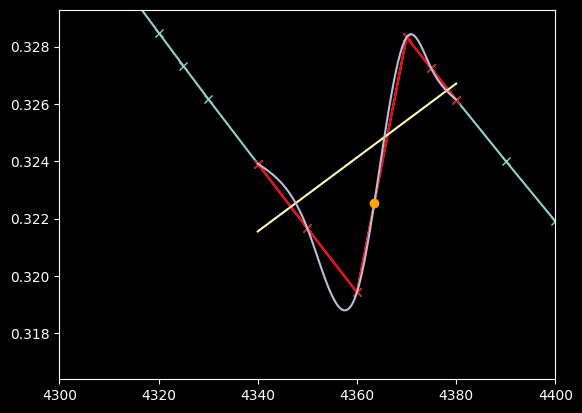

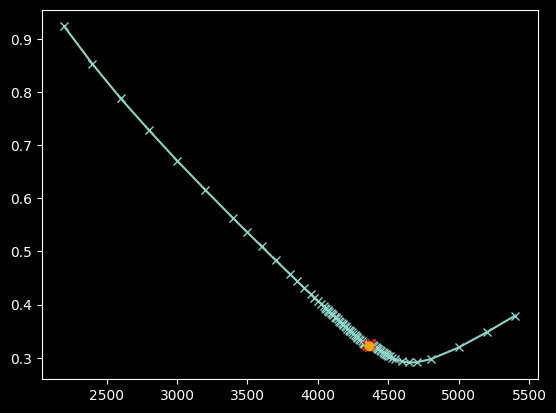

T: 2022-04-01


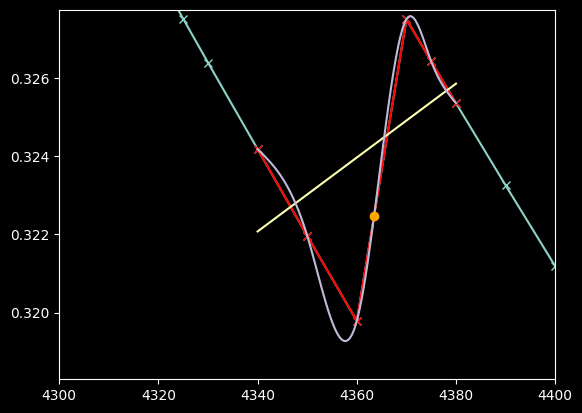

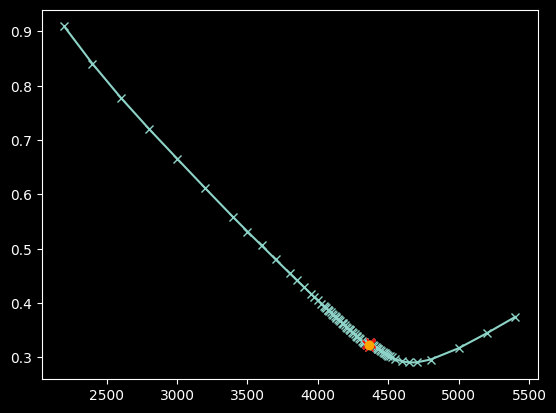

T: 2022-04-08


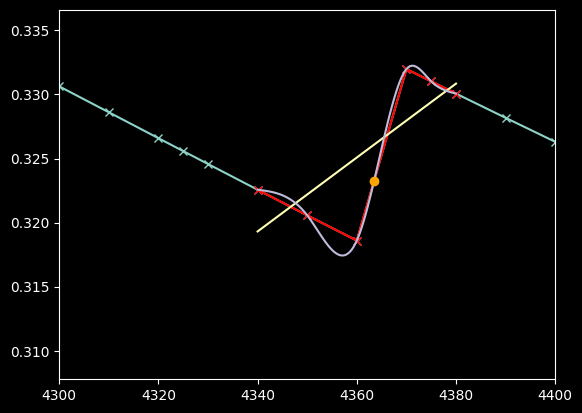

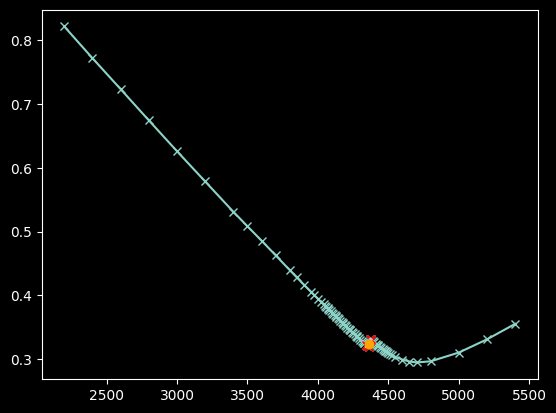

T: 2022-04-14


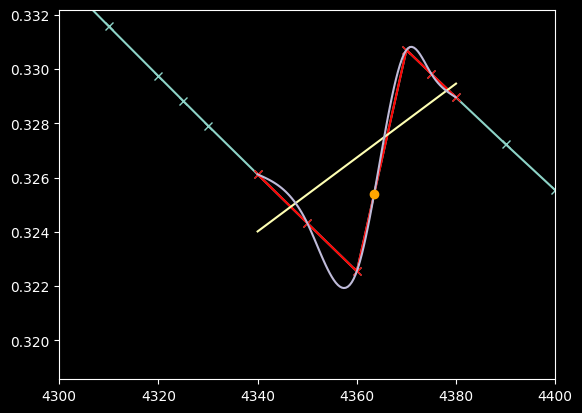

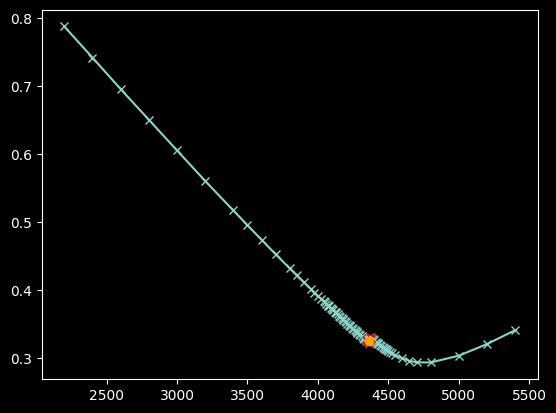

T: 2022-04-22


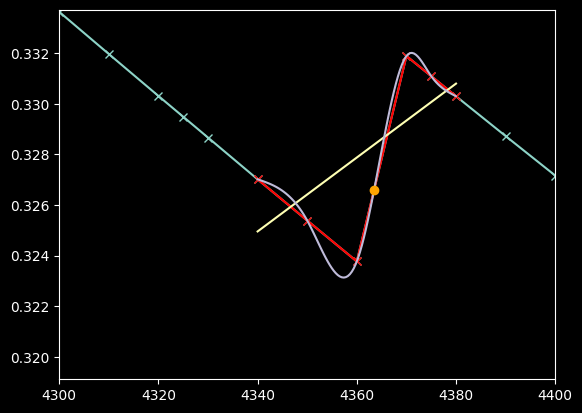

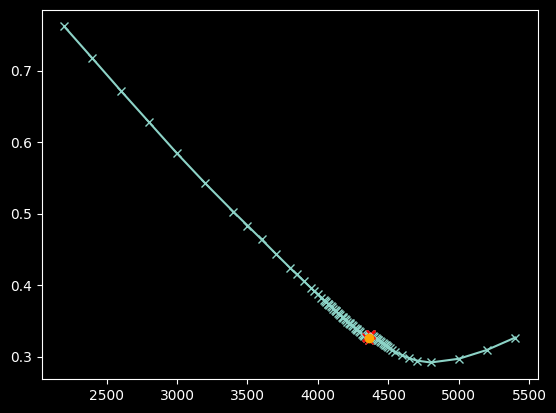

T: 2022-04-29


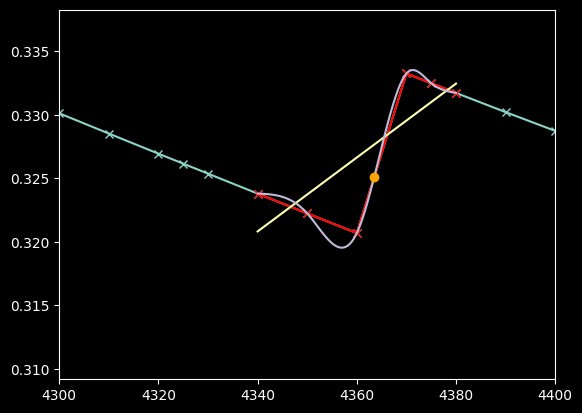

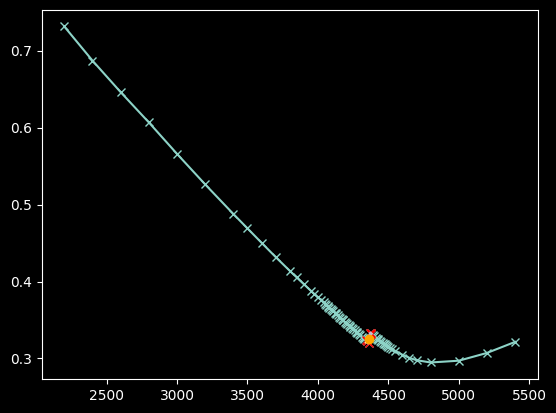

T: 2022-05-20


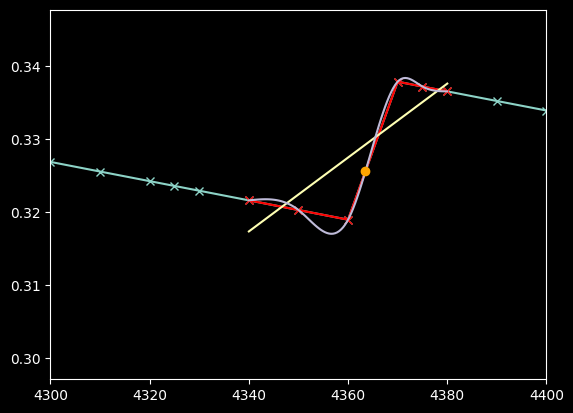

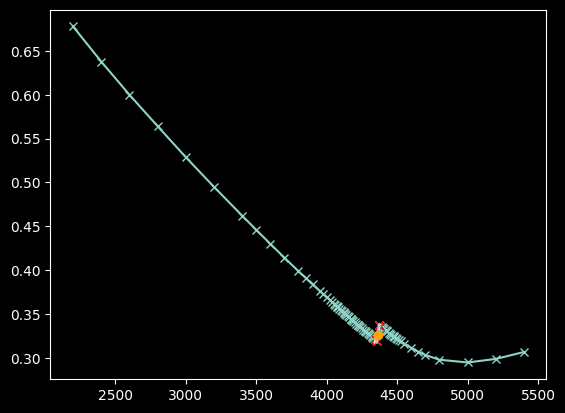

T: 2022-05-31


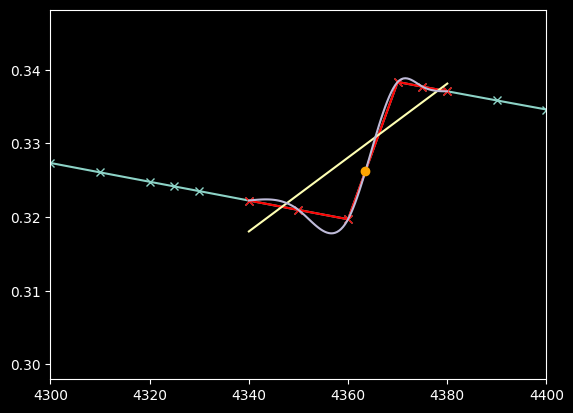

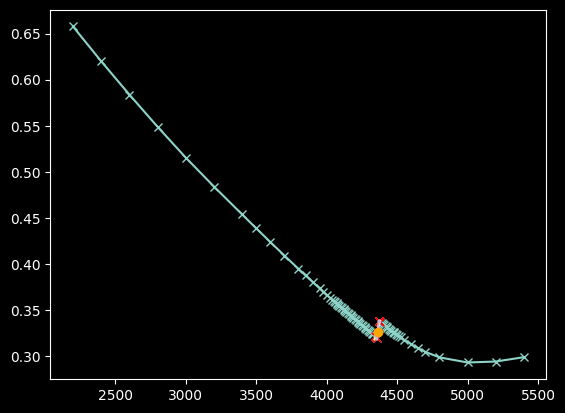

T: 2022-06-17


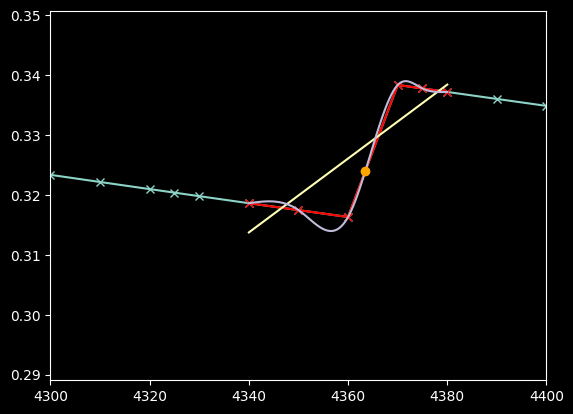

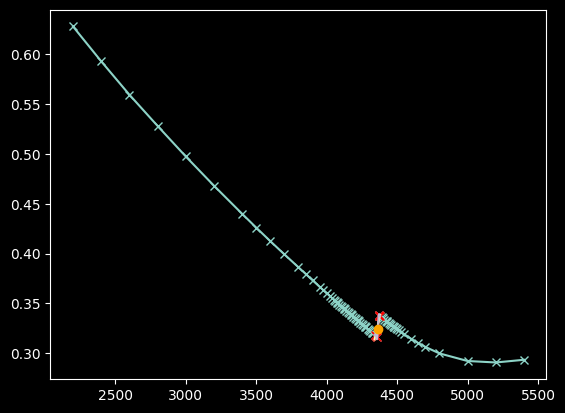

T: 2022-06-30


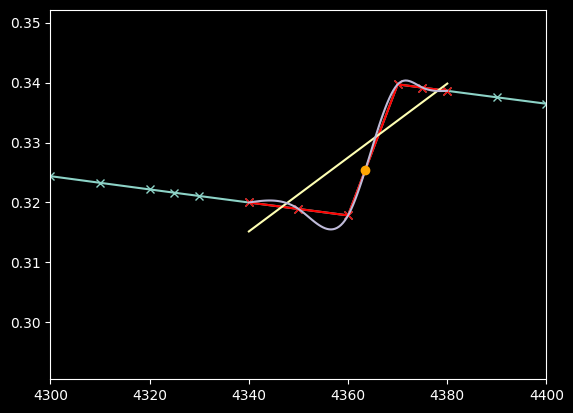

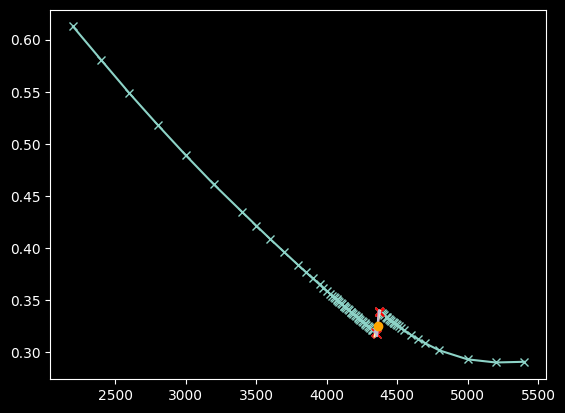

T: 2022-07-15


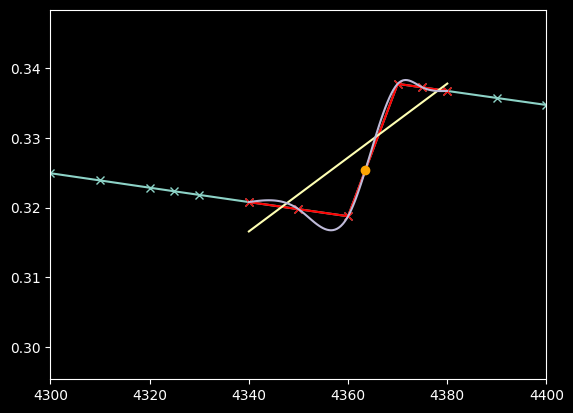

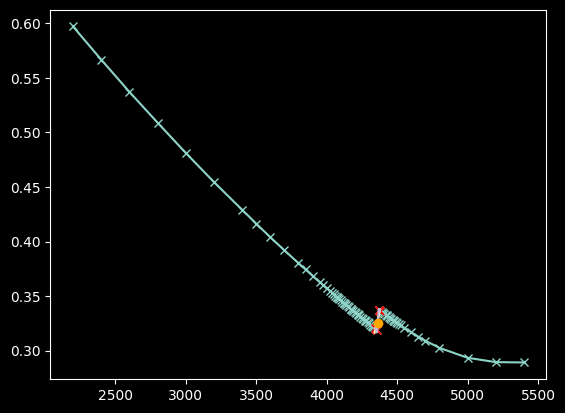

T: 2022-07-29


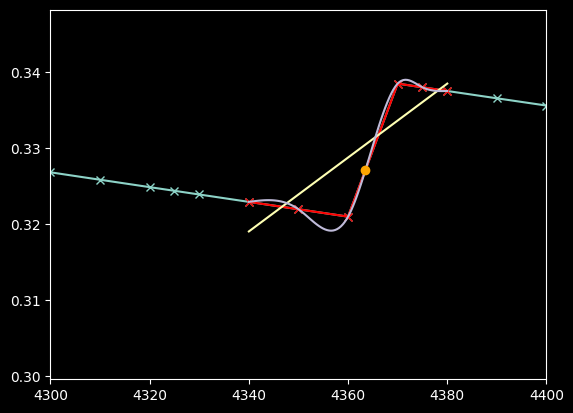

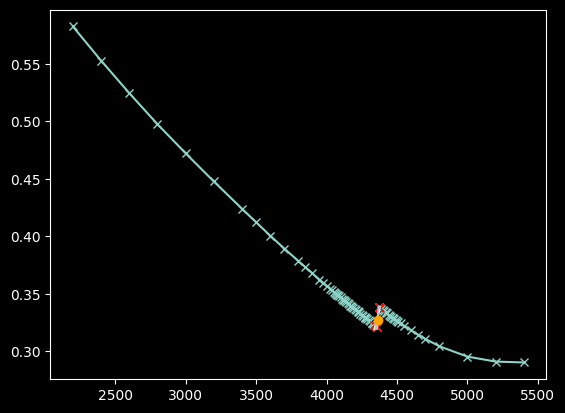

T: 2022-08-31


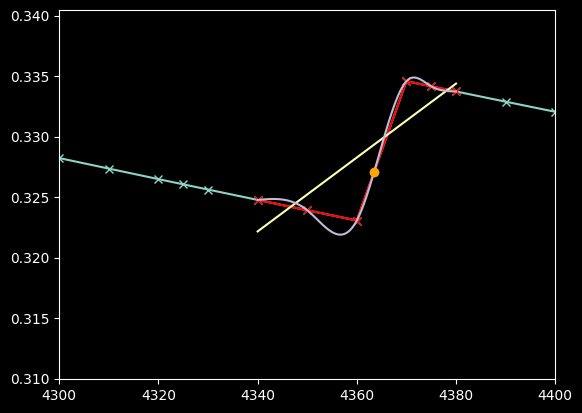

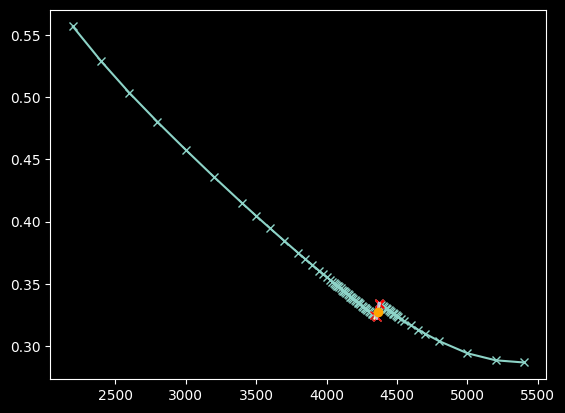

In [8]:
plot_closeup = True

volatility_surface = spx_vs
surface = volatility_surface.surface_quantities(
	time=time,
	quantity_method="model_pricing_implied_volatility",
	price_types=["Mid"],
	out_the_money=True,
	pricing_model=PricingModel(),
	model=model,
)[0]
t2x = time_to_expiry(time, volatility_surface.expiries)

for i, expiry in enumerate(volatility_surface.expiries):
	print(f"T: {expiry}")
	indices = find_closest_strikes(
		strikes=volatility_surface.strikes,
		spot=volatility_surface.underlying.price(time=time),
	)
	# print(indices)
	cs = CubicSpline(
		x=indices,
		y=cast(DataFrame, surface.xs(key=expiry, level=1)).loc[indices, "Symbol"].values,
		bc_type="natural",
	)
	x = np.linspace(indices.min(), indices.max(), 100)
	s, i = np.polyfit(indices, cast(DataFrame, surface.xs(key=expiry, level=1)).loc[indices, "Symbol"].to_numpy(), 1)

	if plot_closeup:
		plt.plot(volatility_surface.strikes, cast(DataFrame, surface.xs(key=expiry, level=1)).loc[volatility_surface.strikes, "Symbol"].values, linestyle=None, marker="x")
		plt.plot(indices, cast(DataFrame, surface.xs(key=expiry, level=1)).loc[indices, "Symbol"].values, linestyle=None, marker="x", color="red")
		plt.plot(x, s * x + i)
		plt.plot(x, cs(x))
		plt.plot((spot := volatility_surface.underlying.price(time=time)), cs(spot), color="orange", marker="o")
		plt.gca().set_xlim(4300, 4400)
		lims = np.array([s * 4300 + i, s * 4400 + i])
		plt.gca().set_ylim(lims.min(), lims.max())
		plt.show()

	plt.plot(volatility_surface.strikes, cast(DataFrame, surface.xs(key=expiry, level=1)).loc[volatility_surface.strikes, "Symbol"].values, linestyle=None, marker="x")
	plt.plot(indices, cast(DataFrame, surface.xs(key=expiry, level=1)).loc[indices, "Symbol"].values, linestyle=None, marker="x", color="red")
	plt.plot(x, s * x + i)
	plt.plot(x, cs(x))
	plt.plot((spot := volatility_surface.underlying.price(time=time)), cs(spot), color="orange", marker="o")
	plt.show()

T: 2022-03-04


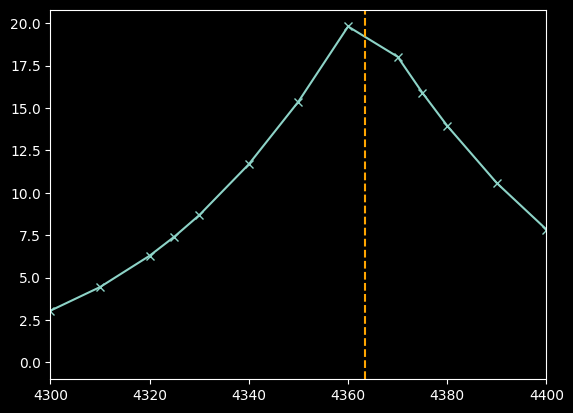

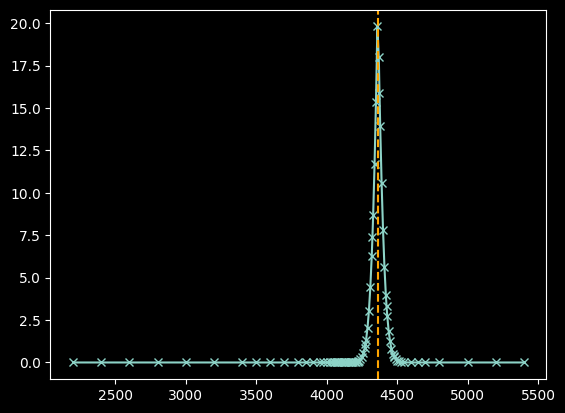

T: 2022-03-09


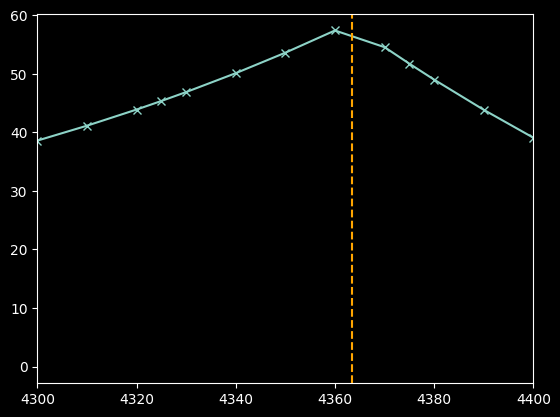

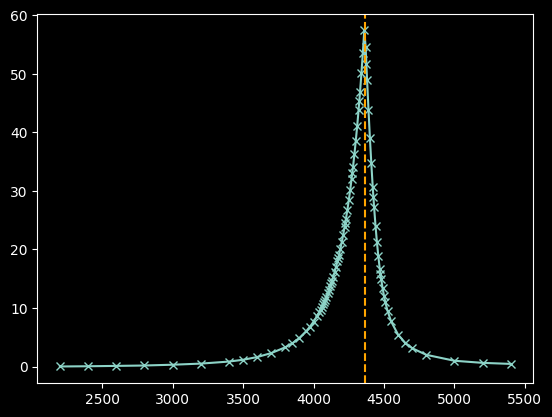

T: 2022-03-11


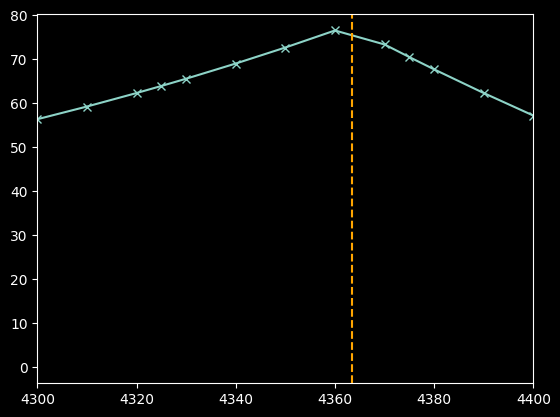

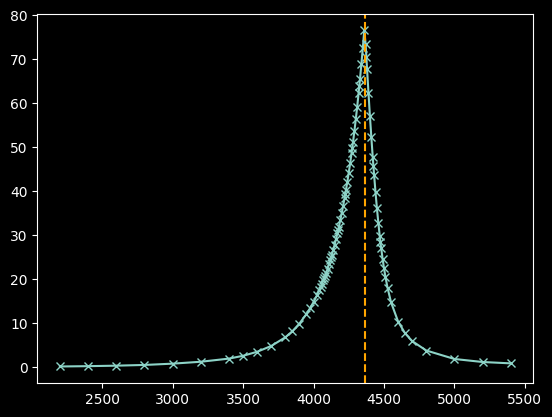

T: 2022-03-18


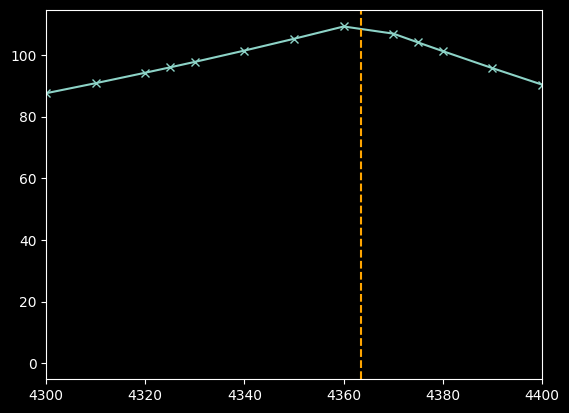

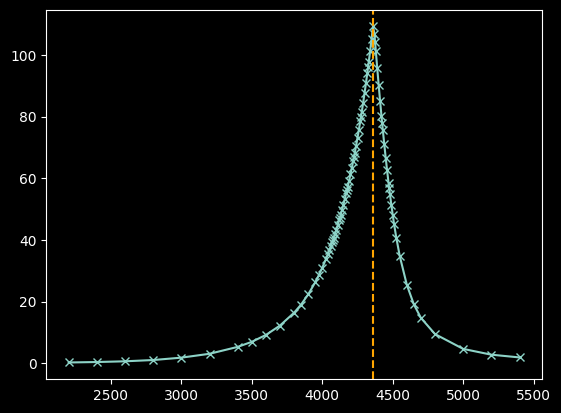

T: 2022-03-23


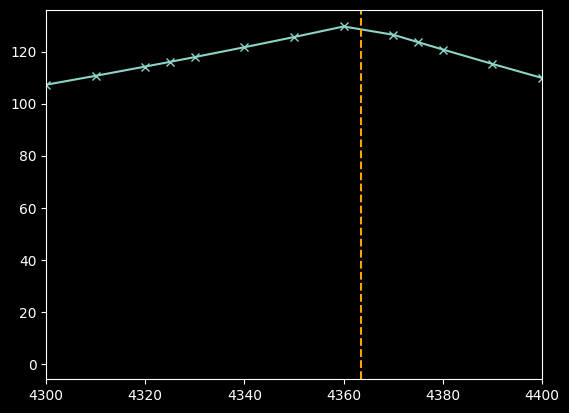

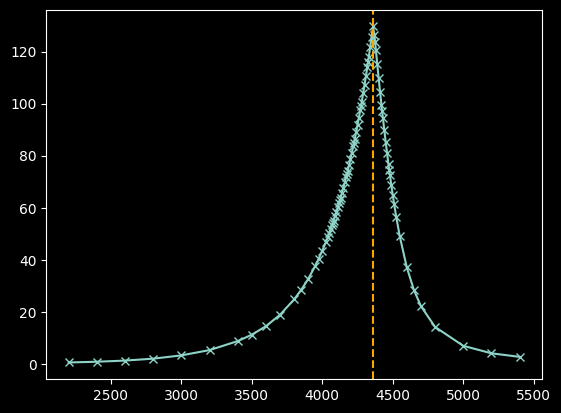

T: 2022-03-25


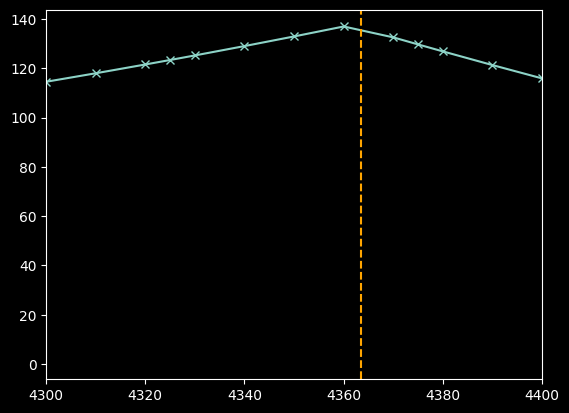

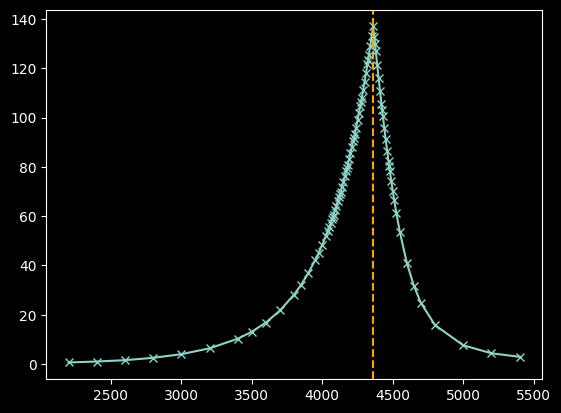

T: 2022-03-30


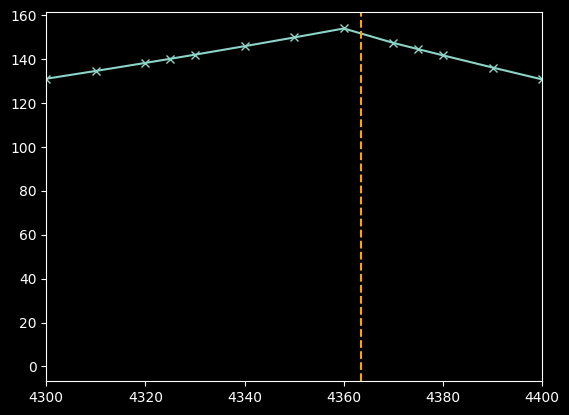

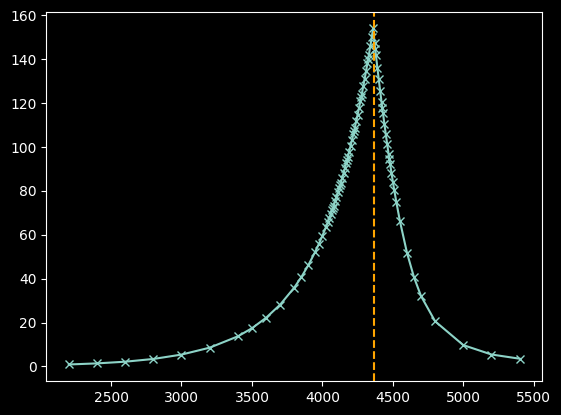

T: 2022-03-31


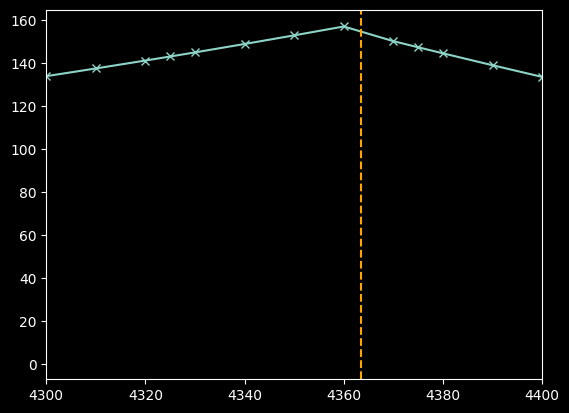

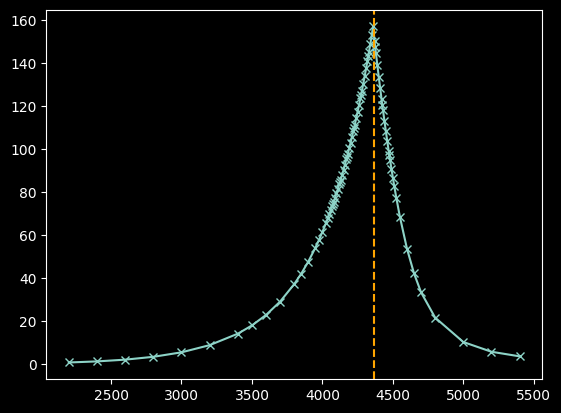

T: 2022-04-01


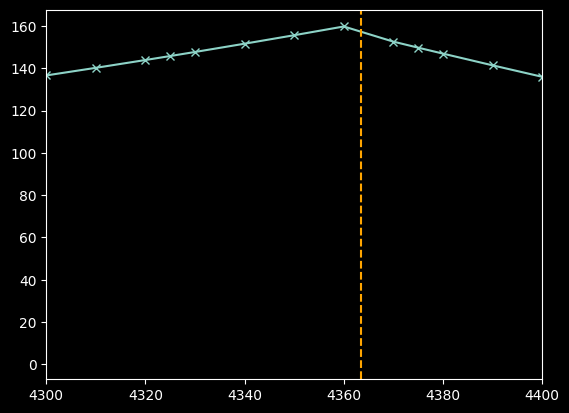

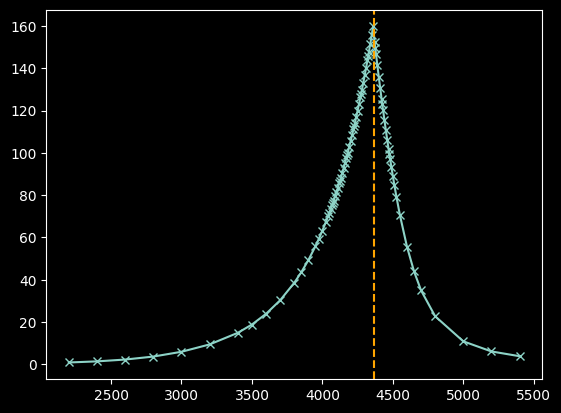

T: 2022-04-08


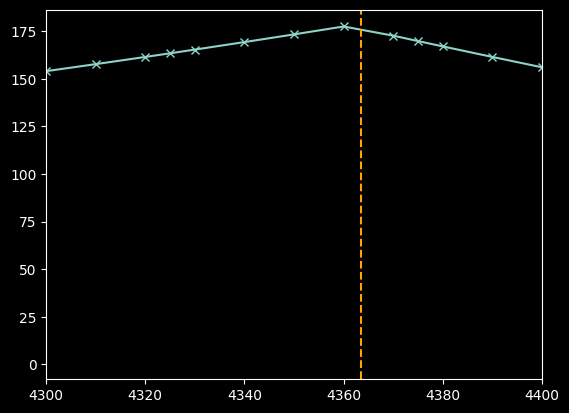

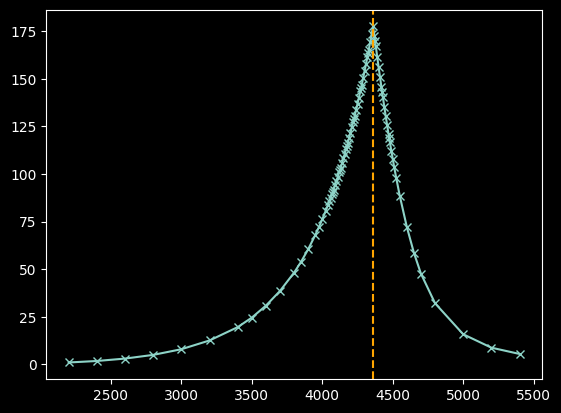

T: 2022-04-14


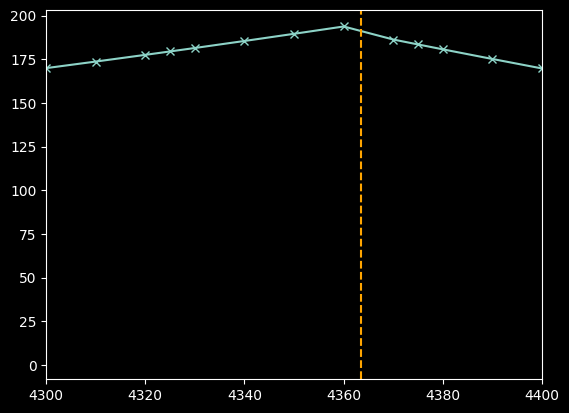

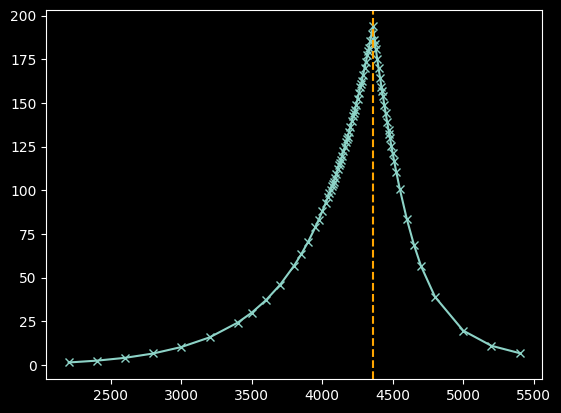

T: 2022-04-22


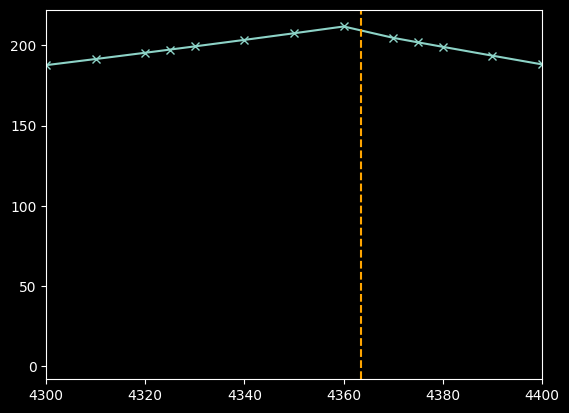

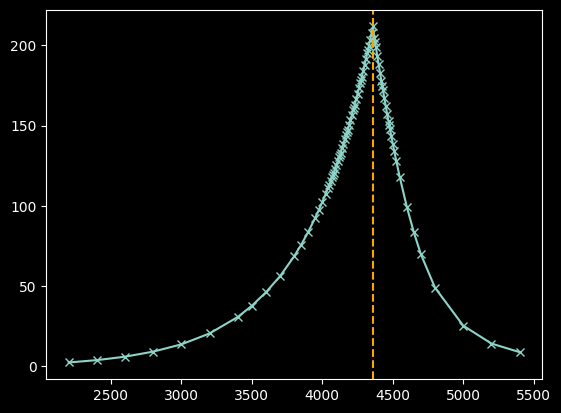

T: 2022-04-29


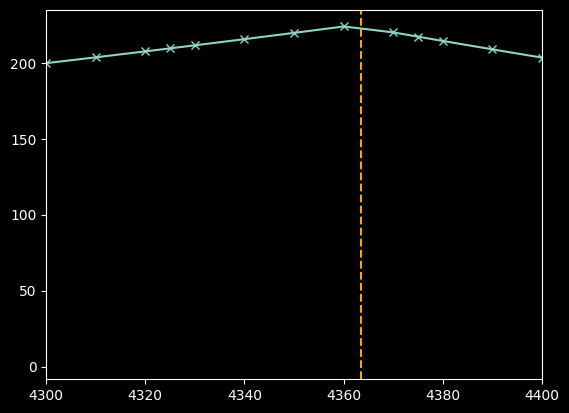

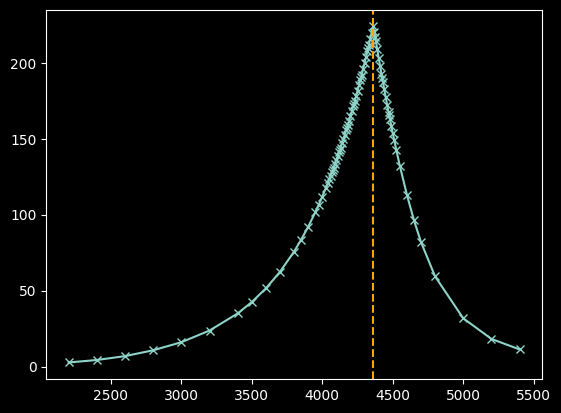

T: 2022-05-20


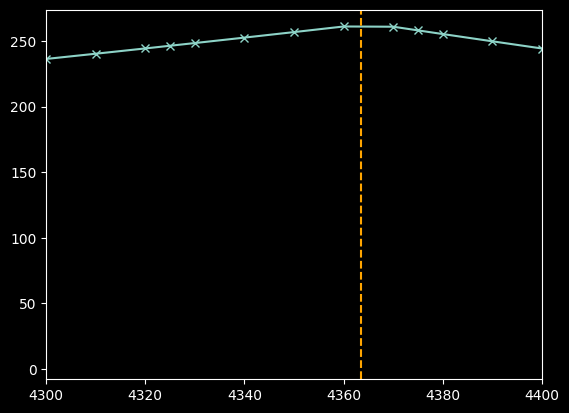

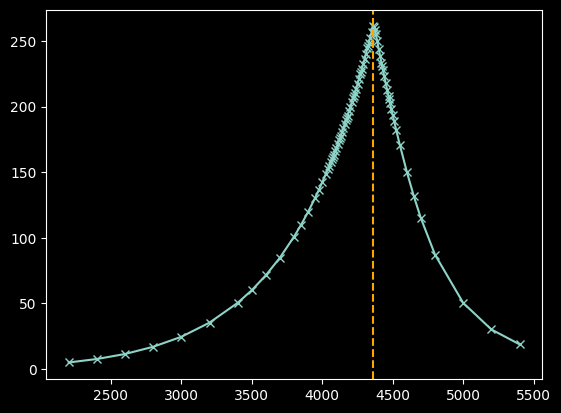

T: 2022-05-31


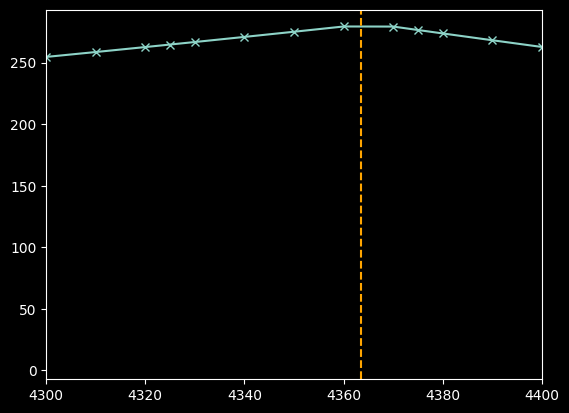

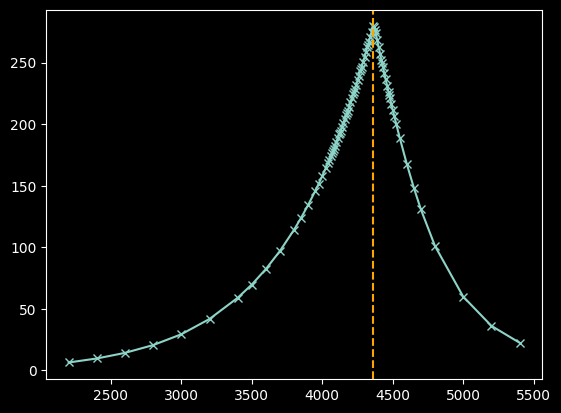

T: 2022-06-17


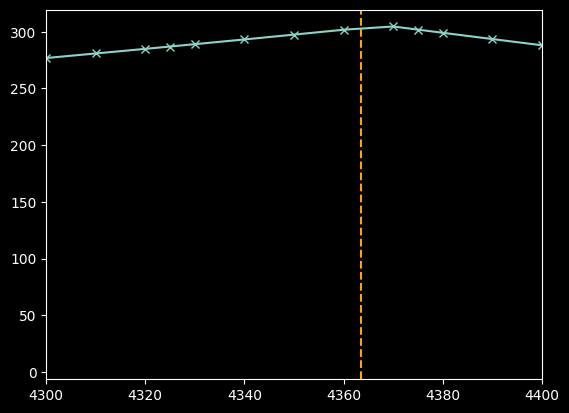

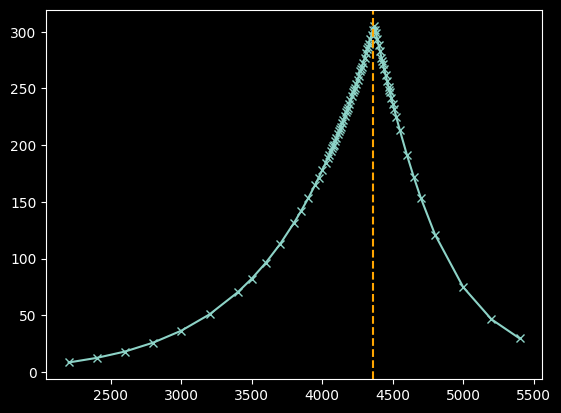

T: 2022-06-30


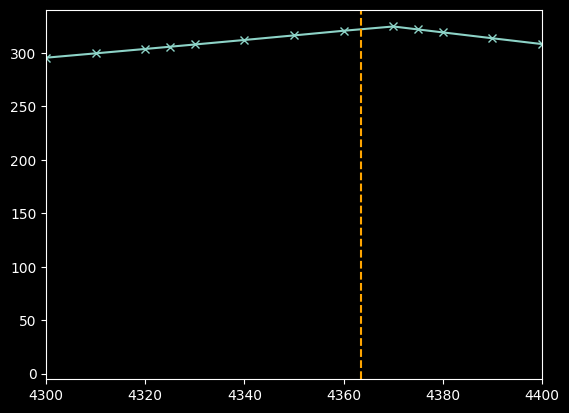

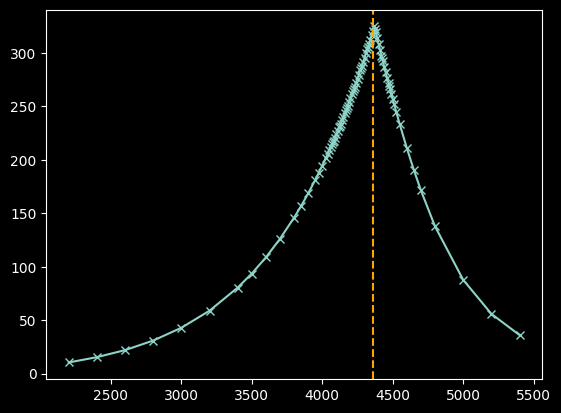

T: 2022-07-15


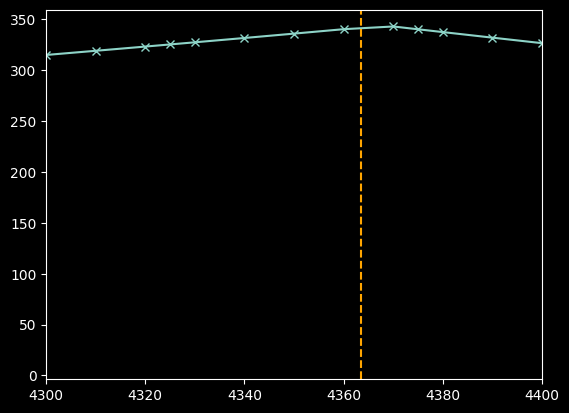

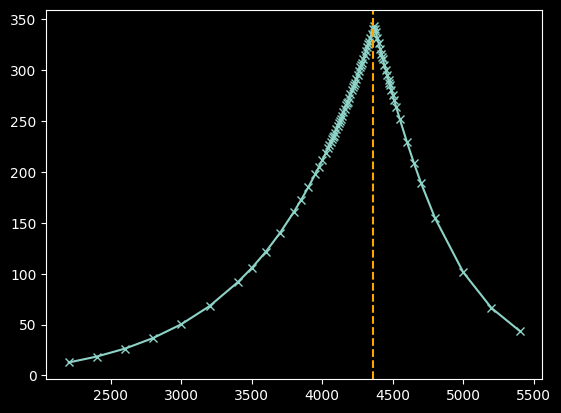

T: 2022-07-29


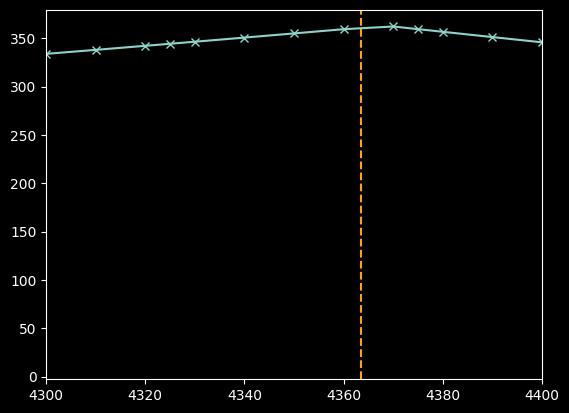

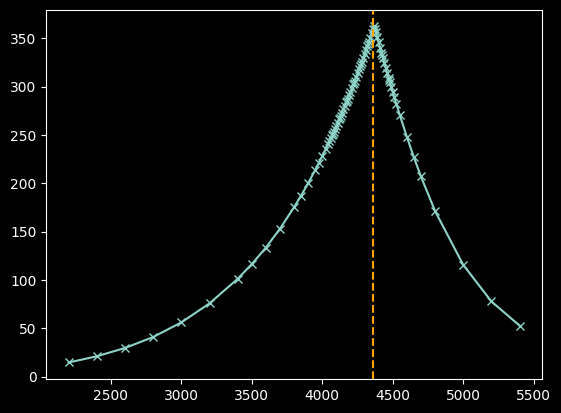

T: 2022-08-31


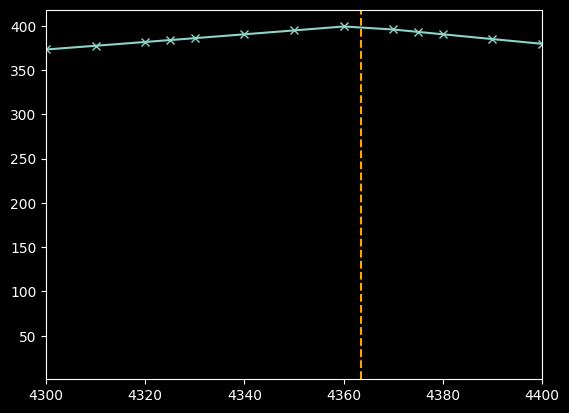

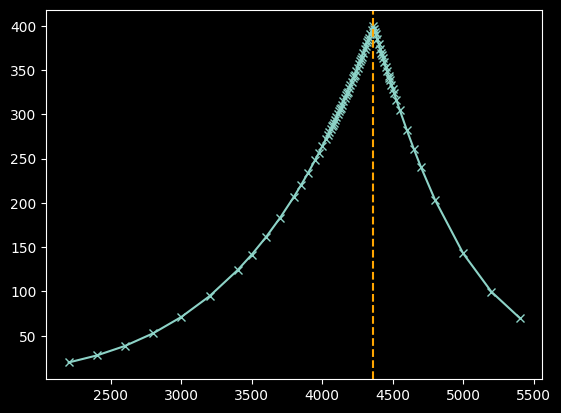

In [9]:
plot_closeup = True

volatility_surface = spx_vs
surface = volatility_surface.surface_quantities(
	time=time,
	quantity_method="model_price",
	price_types=["Mid"],
	out_the_money=True,
	model=model,
)[0]
for expiry in volatility_surface.expiries:
	print(f"T: {expiry}")
	indices = find_closest_strikes(
		strikes=volatility_surface.strikes,
		spot=volatility_surface.underlying.price(time=time),
	)
	x = np.linspace(indices.min(), indices.max(), 100)

	if plot_closeup:
		plt.plot(volatility_surface.strikes, cast(DataFrame, surface.xs(key=expiry, level=1)).loc[volatility_surface.strikes, "Symbol"].values, linestyle=None, marker="x")
		plt.axvline(spot, color="orange", linestyle="dashed")
		plt.gca().set_xlim(4300, 4400)
		plt.show()

	plt.plot(volatility_surface.strikes, cast(DataFrame, surface.xs(key=expiry, level=1)).loc[volatility_surface.strikes, "Symbol"].values, linestyle=None, marker="x")
	plt.axvline(spot, color="orange", linestyle="dashed")
	plt.show()

In [10]:
# parameters = model.fit(
# 	index_volatility_surface=spx_vs,
# 	volatility_index_volatility_surface=vix_vs,
# 	time=time,
# 	pricing_model=PricingModel(),
# )
# print(parameters)


546.4057606451892


<Axes: >

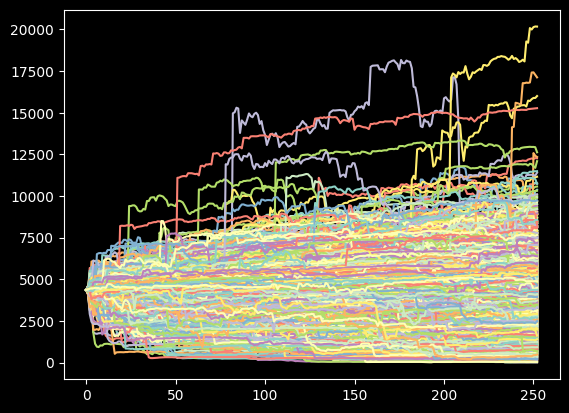

In [11]:
spot = spx.price(time=time)
strike = 4300
parameters = {
	"hurst_index": 0.93,
	"wiener_correlation": -0.9,
	"volatility_of_volatility": 1.9,
}

price_process, variance_process, parallel_price_process = simulate(
	spot=spot,
	ticker="SPX",
	time=time,
	initial_variance=0.235**2,
	**parameters,
	simulation_length=1,
	steps_per_year=252,
	num_paths=2**13,
	monthly=False,
)

price = np.mean(np.maximum((price_process[:, -1] - strike) * -1, 0))
print(price)

pd.DataFrame(price_process.T).plot(legend=False)